## Introduction

In this tutorial, we'll discuss the details of generating different synthetic datasets using Numpy and Scikit-learn libraries. We'll see how different samples can be generated from various distributions with known parameters.
Reference: https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/

In [1]:
import numpy as np

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [2]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

## 1 Generating 1D samples from Known Distribution

The random module from *numpy* offers a wide range ways to generate random numbers sampled from a known distribution with a fixed set of parameters. For reproduction purposes, we'll pass the seed to the *RandomState* call and as long as we use that same seed, we'll get the same numbers.

Let's define a distribution list, such as *uniform*, *normal*, *exponential*, etc, a parameter list, and a color list so that we can visually discern between these:

In [3]:
rand = np.random.RandomState(seed)    

dist_list = ['uniform','normal','exponential','lognormal','chisquare','beta']
param_list = ['-1,1','0,1','1','0,1','2','0.5,0.9']
colors_list = ['green','blue','yellow','cyan','magenta','pink']

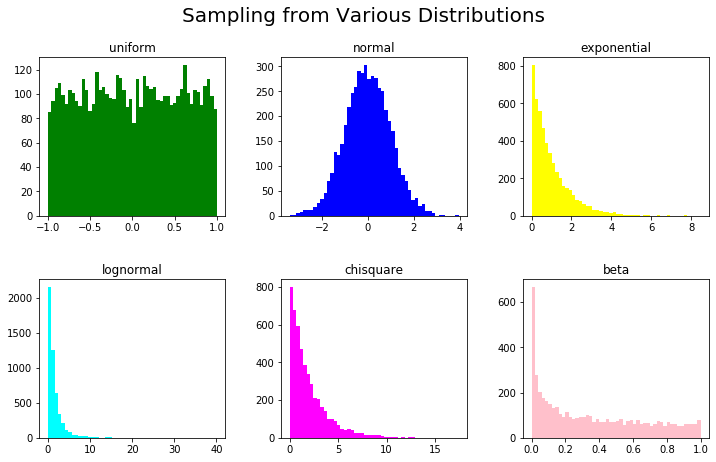

In [4]:
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(12,7))
plt_ind_list = np.arange(6)+231

for dist, plt_ind, param, colors in zip(dist_list, plt_ind_list, param_list, colors_list):
    x = eval('rand.'+dist+'('+param+',5000)') 
    
    plt.subplot(plt_ind)
    plt.hist(x,bins=50,color=colors)
    plt.title(dist)

fig.subplots_adjust(hspace=0.4,wspace=.3) 
plt.suptitle('Sampling from Various Distributions',fontsize=20)
plt.show()

## 2 Synthetic Data for Regression 

The *sklearn.datasets* package has functions for generating synthetic datasets for regression. Here, we discuss linear and non-linear data for regression.

The *make_regression()* function returns a set of input data points (regressors) along with their output (target). This function can be adjusted with the following parameters:

1. *n_features* - number of dimensions/features of the generated data
2. *noise* - standard deviation of gaussian noise
3. *n_samples* - number of samples

In the code below, synthetic data has been generated for different noise levels and consists of two input features and one target variable. The changing color of the input points shows the variation in the target's value, corresponding to the data point. The data is generated in 2D for better visualization, but high-dimensional data can be created using the *n_features* parameter:

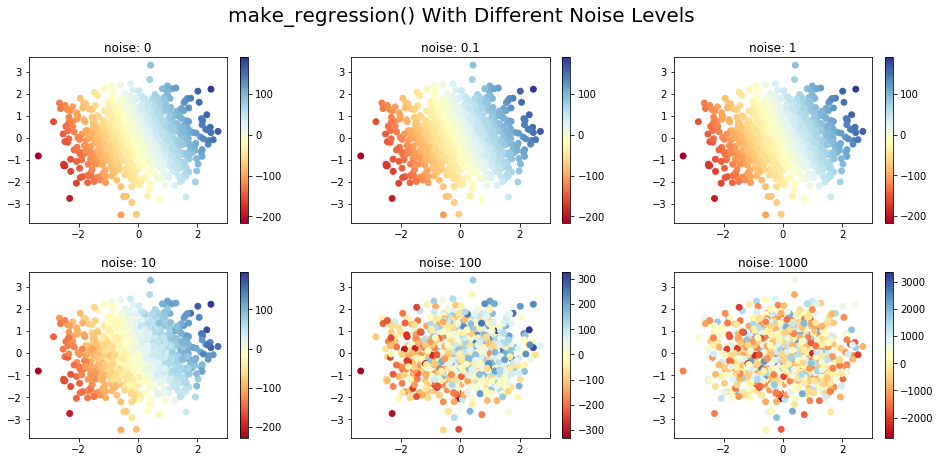

In [5]:
map_colors = plt.cm.get_cmap('RdYlBu')
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(16,7))
plt_ind_list = np.arange(6)+231

for noise,plt_ind in zip([0,0.1,1,10,100,1000],plt_ind_list): 
    x,y = dt.make_regression(n_samples=1000,
                             n_features=2,
                             noise=noise,
                             random_state=rand_state) 
    
    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=y,
                                  vmin=min(y),
                                  vmax=max(y),
                                  s=35,
                                  cmap=color_map)
    
    plt.title('noise: '+str(noise))
    plt.colorbar(my_scatter_plot)
    
fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('make_regression() With Different Noise Levels',fontsize=20)
plt.show()

## 3 Synthetic Data for Classification

Scikit-learn has simple and easy-to-use functions for generating datasets for classification in the *sklearn.dataset* module. Let's go through a couple of examples.

*make_classification()* for n-Class Classification Problems

For n-class classification problems, the *make_classification()* function has several options:

*class_sep*: Specifies whether different classes should be more spread out and easier to discriminate
- *n_features*: Number of features
- *n_redundant*: Number of redundant features
- *n_repeated*: Number of repeated features
- *n_classes*: Total number of classes

Let's make a classification dataset for two-dimensional input data. We'll have different values of *class_sep* for a binary classification problem. The same colored points belong to the same class. It's worth noting that this function can also generate imbalanced classes:

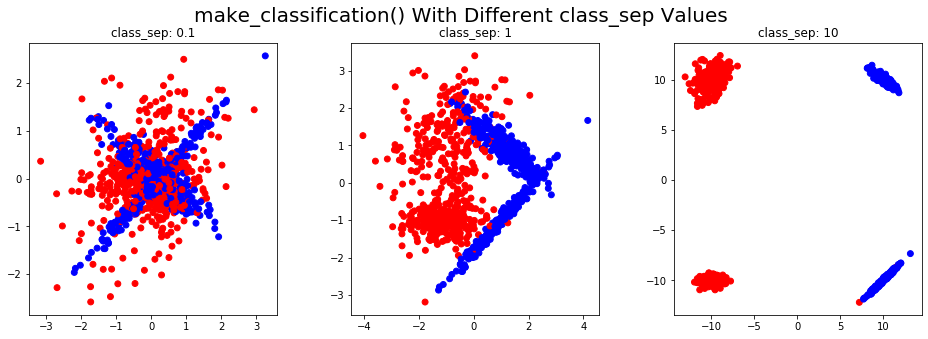

In [6]:
fig,ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))
plt_ind_list = np.arange(3)+131

for class_sep,plt_ind in zip([0.1,1,10],plt_ind_list):
    x,y = dt.make_classification(n_samples=1000,
                                 n_features=2,
                                 n_repeated=0,
                                 class_sep=class_sep,
                                 n_redundant=0,
                                 random_state=rand_state)
    
    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=y,
                                  vmin=min(y),
                                  vmax=max(y),
                                  s=35,
                                  cmap=color_map_discrete)
    plt.title('class_sep: '+str(class_sep))

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('make_classification() With Different class_sep Values',fontsize=20)
plt.show()

## 4 Synthetic Data for Clustering

For clustering, the *sklearn.datasets* provides several options. Here, we'll cover the *make_blobs()* 

The *make_blobs()* function generates data from isotropic Gaussian distributions. The number of features, the number of centers, and each cluster's standard deviation can be specified as an argument.
Here, we illustrate this function in 2D and show how data points change with different values of *cluster_std* parameter:

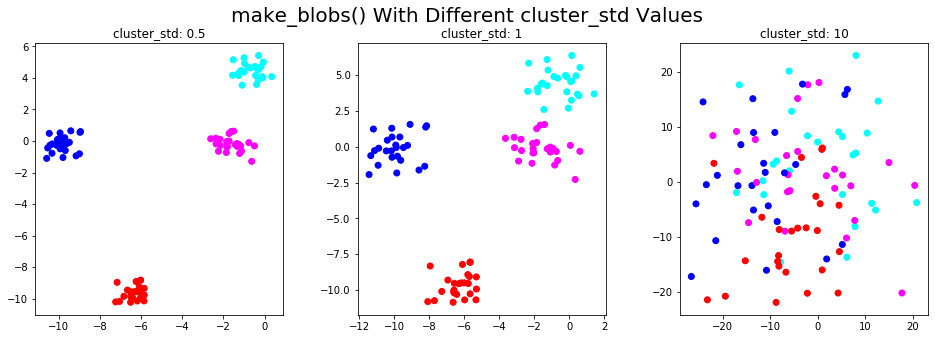

In [7]:
fig,ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))
plt_ind_list = np.arange(3)+131

for std,plt_ind in zip([0.5,1,10],plt_ind_list):
    x, label = dt.make_blobs(n_features=2,
                             centers=4,
                             cluster_std=std,
                             random_state=rand_state)
    
    plt.subplot(plt_ind)    
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=label,
                                  vmin=min(label),
                                  vmax=max(label),
                                  cmap=color_map_discrete)
    plt.title('cluster_std: '+str(std))

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('make_blobs() With Different cluster_std Values',fontsize=20)
plt.show()

## 5 Generating Samples Derived from an Input Dataset

There are many ways of generating additional data samples from an existing dataset. Here, we illustrate a very simple method that first estimates the kernel density of data using a Gaussian kernel and then generates additional samples from this distribution.

To visualize the newly generated samples, let's look at the Olivetti faces dataset, retrievable via *sklearn.datasets.fetch_olivetti_faces()*. The dataset has 10 different face images of 40 different people.

Here's what we'll be doing:

1. Get the faces data
2. Generate the kernel density model from data
3. Use the kernel density to generate new samples of data
4. Display the original and synthetic faces.

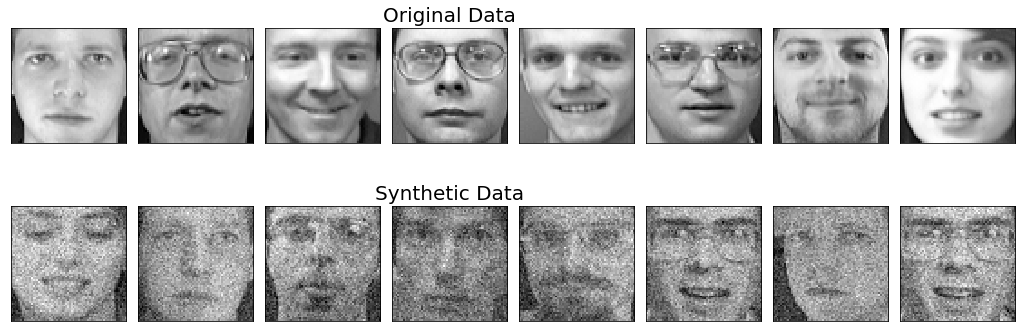

In [8]:
# Fetch the dataset and store in X
faces = dt.fetch_olivetti_faces()
X= faces.data

# Fit a kernel density model using GridSearchCV to determine the best parameter for bandwidth
bandwidth_params = {'bandwidth': np.arange(0.01,1,0.05)}
grid_search = GridSearchCV(KernelDensity(), bandwidth_params)
grid_search.fit(X)
kde = grid_search.best_estimator_

# Generate/sample 8 new faces from this dataset
new_faces = kde.sample(8, random_state=rand_state)

# Show a sample of 8 original face images and 8 generated faces derived from the faces dataset
fig,ax = plt.subplots(nrows=2, ncols=8,figsize=(18,6),subplot_kw=dict(xticks=[], yticks=[]))
for i in np.arange(8):
    ax[0,i].imshow(X[10*i,:].reshape(64,64),cmap=plt.cm.gray)   
    ax[1,i].imshow(new_faces[i,:].reshape(64,64),cmap=plt.cm.gray)    
ax[0,3].set_title('Original Data',fontsize=20)
ax[1,3].set_title('Synthetic Data',fontsize=20)
fig.subplots_adjust(wspace=.1)
plt.show()

Have a nice day!